# Pandas Einführung mit (Fachrepositorium Lebenswissenschaften) FRL-Daten

In [2]:
import matplotlib
import pandas as pd
import urllib.request

## Daten herunterladen und einlesen

In [3]:
# Download

url_data_files = "https://raw.githubusercontent.com/lschruff/library_carpentry_workshops/refs/heads/main/pandas_python_lesson/2025-12-01_frl_export_files.csv"
filename_files = "frl_export_files.csv"

urllib.request.urlretrieve(url_data_files, filename_files)

('frl_export_files.csv', <http.client.HTTPMessage at 0x23bb24a65d0>)

In [4]:
# Datei einlesen

df_files = pd.read_csv(filename_files)

## Dataframe anschauen

In [5]:
df_files

,@id,accessScheme,contentType,parentPid,publishScheme,hasData_checksum_checksumValue,hasData_fileLabel,hasData_format,hasData_size,isDescribedBy_created,isDescribedBy_createdBy
0,frl:6489464,public,file,frl:6489463,public,c490ca6b23c5e4048f1eb0b231050990,LfULG_Schriftenreihe_11_2024.pdf,application/pdf,13647585,2025-01-08T14:06:26.786+0100,18.0
1,frl:6489469,public,file,frl:6489468,public,6aded9fcd83c7bd62084ac33d985540e,LfULG_Schriftenreihe_14_2024.pdf,application/pdf,7371321,2025-01-13T13:54:48.409+0100,18.0
2,frl:6489471,public,file,frl:6489470,public,5ab54c8303318337881f293718f694f7,LfULG_Schriftenreihe_13_2024.pdf,application/pdf,1580236,2025-01-13T14:05:47.602+0100,18.0
3,frl:6489473,public,file,frl:6489472,public,28c5a18561c612ba8108ea7f9eda88c1,FOM-Forschung-ifgs-Schriftenreihe-31-Behrens-e...,application/pdf,7959219,2025-01-13T15:16:20.336+0100,26.0
4,frl:6489478,public,file,frl:6489467,public,eb6626b1c7f0ff5799d688640852cb76,IGB_Dossier_Naehrstoffbelastung_Arendsee_final...,application/pdf,3393073,2025-01-16T09:10:55.128+0100,339.0
...,...,...,...,...,...,...,...,...,...,...,...
1209,frl:6526453,public,file,frl:6526450,public,cc73bafe51bcad41b0aaa3046548080e,UFZReport2022_1.pdf,application/pdf,841395,2025-11-26T12:27:44.776+0100,20.0
1210,frl:6526454,public,file,frl:6526383,public,315c7a4bd8796c9165547f6721d06cfd,wido_arz_Der GKV-Arzneimittelmarkt_Klassifikat...,application/pdf,4350149,2025-11-27T06:59:29.881+0100,339.0
1211,frl:6526456,public,file,frl:6526455,public,93dfa42787d5ea1f046376f8d7d4bfd1,efs78Waldkolloquium2025.pdf,application/pdf,6031463,2025-11-27T10:31:13.661+0100,22.0
1212,frl:6526457,public,file,frl:6526450,public,cc73bafe51bcad41b0aaa3046548080e,UFZReport2022_1.pdf,application/pdf,841395,2025-11-27T12:22:59.492+0100,20.0


In [6]:
# Umfang des DS anzeigen

df_files.shape

(1214, 11)

In [7]:
# Liste der Spaltenüberschriften 

df_files.columns

Index(['@id', 'accessScheme', 'contentType', 'parentPid', 'publishScheme',
       'hasData_checksum_checksumValue', 'hasData_fileLabel', 'hasData_format',
       'hasData_size', 'isDescribedBy_created', 'isDescribedBy_createdBy'],
      dtype='object')

# Mit Spalten arbeiten

In [8]:
# Nur die Werte einer bestimmten Spalte anzeigen

df_files["hasData_size"]

0       13647585
1        7371321
2        1580236
3        7959219
4        3393073
          ...   
1209      841395
1210     4350149
1211     6031463
1212      841395
1213     3136646
Name: hasData_size, Length: 1214, dtype: int64

In [9]:
# Neue Spalte

df_files["hasData_size_mb"] = df_files["hasData_size"]

In [10]:
df_files.columns

Index(['@id', 'accessScheme', 'contentType', 'parentPid', 'publishScheme',
       'hasData_checksum_checksumValue', 'hasData_fileLabel', 'hasData_format',
       'hasData_size', 'isDescribedBy_created', 'isDescribedBy_createdBy',
       'hasData_size_mb'],
      dtype='object')

In [11]:
# Werte der neuen Spalte unformen (Bytes => MB)

df_files["hasData_size_mb"] = df_files["hasData_size_mb"] * 0.000001

In [13]:
df_files["hasData_size_mb"].head(5)

0    13.647585
1     7.371321
2     1.580236
3     7.959219
4     3.393073
Name: hasData_size_mb, dtype: float64

In [14]:
# Datentyp der Werte für die Spalte ändern (float => int)

df_files["hasData_size_mb"] = df_files["hasData_size_mb"].astype(int)

In [15]:
df_files["hasData_size_mb"].head(5)

0    13
1     7
2     1
3     7
4     3
Name: hasData_size_mb, dtype: int64

In [16]:
# Spalte umbenennen

df_files.rename(columns={"hasData_size": "hasData_size_bytes"}, inplace=True)

In [17]:
df_files.columns

Index(['@id', 'accessScheme', 'contentType', 'parentPid', 'publishScheme',
       'hasData_checksum_checksumValue', 'hasData_fileLabel', 'hasData_format',
       'hasData_size_bytes', 'isDescribedBy_created',
       'isDescribedBy_createdBy', 'hasData_size_mb'],
      dtype='object')

In [18]:
df_files["hasData_size_mb"].describe()

count    1214.000000
mean        5.090610
std        22.407822
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       589.000000
Name: hasData_size_mb, dtype: float64

In [19]:
df_files["hasData_size_mb"].max()

np.int64(589)

In [20]:
df_files["hasData_size_mb"].median().astype(int)

np.int64(1)

# Dataframe filtern

In [21]:
# Welche Dateien sind größer als 50MB?

df_files["hasData_size_mb"] >= 50

0       False
1       False
2       False
3       False
4       False
        ...  
1209    False
1210    False
1211    False
1212    False
1213    False
Name: hasData_size_mb, Length: 1214, dtype: bool

In [22]:
# Filtere den Dataframe nach o.g. Bedingungen

df_files[df_files["hasData_size_mb"] >= 50] 

,@id,accessScheme,contentType,parentPid,publishScheme,hasData_checksum_checksumValue,hasData_fileLabel,hasData_format,hasData_size_bytes,isDescribedBy_created,isDescribedBy_createdBy,hasData_size_mb
132,frl:6510240,public,file,frl:6510215,public,26c0282419a246d860a27c468b8d9980,VACCELERATE SHOWCASE EVENT JANUARY 23 2025_ Pr...,video/mp4,110881777,2025-02-27T10:36:46.420+0100,288.0,110
175,frl:6510333,public,file,frl:6510306,public,b2e84e3b3ad571f2623b809be88f3085,video1349932953.mp4,video/mp4,61888889,2025-03-07T08:00:52.395+0100,288.0,61
285,frl:6510786,public,file,frl:6510757,public,29bcc635bbaadb4548f25580417916e9,Global Guideline for the Diagnosis and Managem...,video/mp4,55726514,2025-03-25T10:46:31.493+0100,288.0,55
509,frl:6511249,public,file,frl:6510298,public,bafceb7ea93f8776480fda9e1538de5d,Habilitationsschrift_zellbasierteImmunoassays_...,application/pdf,200260966,2025-05-09T13:06:30.007+0200,339.0,200
530,frl:6511301,public,file,frl:6511165,public,ec0323b772f9b181480917c7670a30df,Global Guideline Diagnosis and Management of C...,video/mp4,589613575,2025-05-14T07:11:49.062+0200,288.0,589
566,frl:6511383,public,file,frl:6511298,public,03d6368770f5bbc30a1135cfadc71e09,Antifungal Prophylaxis and Stewardship in HSCT...,video/mp4,137438448,2025-05-15T16:21:32.116+0200,288.0,137
631,frl:6511609,public,file,frl:6511346,public,43aaa5e454dfe7083995d4374ce43664,VACCELERATE WEBINAR Data Interoperability in C...,video/mp4,107503474,2025-06-02T10:31:28.589+0200,288.0,107
653,frl:6511670,public,file,frl:6511614,public,f51c4045ed2eb074fbec815fbf321938,VACCELERATE WEBINAR May 22 2024_ Willingness o...,video/mp4,87053869,2025-06-05T09:58:11.315+0200,288.0,87
716,frl:6511901,public,file,frl:6511894,public,4fd205ae90e65e8e56fccd31ede16c5d,2025 Bodey Lecture_ Hematological Cancer and I...,video/mp4,152182369,2025-06-26T08:01:33.048+0200,339.0,152
856,frl:6525003,public,file,frl:6524885,public,46736de04b1523f3337d472574de93da,Adverse events and side effects.mp4,video/mp4,71146896,2025-07-11T10:50:42.433+0200,288.0,71


In [24]:
df_filtered = df_files[df_files["hasData_size_mb"] >= 50] 
df_filtered.shape

(13, 12)

In [27]:
# Kleinerer gefilterter Dataframe

df_files_size_over_50 = df_files[df_files["hasData_size_mb"] >= 50][["@id", "hasData_format", "hasData_size_mb", "isDescribedBy_createdBy"]]
df_files_size_over_50

,@id,hasData_format,hasData_size_mb,isDescribedBy_createdBy
132,frl:6510240,video/mp4,110,288.0
175,frl:6510333,video/mp4,61,288.0
285,frl:6510786,video/mp4,55,288.0
509,frl:6511249,application/pdf,200,339.0
530,frl:6511301,video/mp4,589,288.0
566,frl:6511383,video/mp4,137,288.0
631,frl:6511609,video/mp4,107,288.0
653,frl:6511670,video/mp4,87,288.0
716,frl:6511901,video/mp4,152,339.0
856,frl:6525003,video/mp4,71,288.0


In [30]:
#Dataframe sortieren

df_files_size_over_50_sorted = df_files_size_over_50.sort_values(by=["hasData_size_mb"], ascending=False)
df_files_size_over_50_sorted

,@id,hasData_format,hasData_size_mb,isDescribedBy_createdBy
530,frl:6511301,video/mp4,589,288.0
1178,frl:6526351,video/mp4,316,288.0
509,frl:6511249,application/pdf,200,339.0
716,frl:6511901,video/mp4,152,339.0
566,frl:6511383,video/mp4,137,288.0
132,frl:6510240,video/mp4,110,288.0
631,frl:6511609,video/mp4,107,288.0
653,frl:6511670,video/mp4,87,288.0
1029,frl:6525596,application/pdf,80,22.0
1107,frl:6526142,video/mp4,76,288.0


In [32]:
# Namen in Spalte umbenennen
df_files_size_over_50_sorted["isDescribedBy_createdBy"] = df_files_size_over_50_sorted["isDescribedBy_createdBy"].replace(288.0, "personA").replace(339.0, "personB").replace(22.0, "personC")
df_files_size_over_50_sorted

,@id,hasData_format,hasData_size_mb,isDescribedBy_createdBy
530,frl:6511301,video/mp4,589,personA
1178,frl:6526351,video/mp4,316,personA
509,frl:6511249,application/pdf,200,personB
716,frl:6511901,video/mp4,152,personB
566,frl:6511383,video/mp4,137,personA
132,frl:6510240,video/mp4,110,personA
631,frl:6511609,video/mp4,107,personA
653,frl:6511670,video/mp4,87,personA
1029,frl:6525596,application/pdf,80,personC
1107,frl:6526142,video/mp4,76,personA


In [33]:
# Dataframe als Datei speichern

df_files_size_over_50_sorted.to_csv("df_files_size_over_50_sorted.csv", index=False)

# Histogramme/Diagramme

<Axes: >

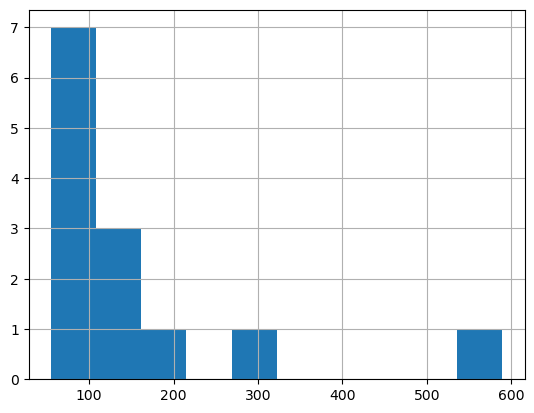

In [34]:
# Einfaches Histogramm

df_files_size_over_50_sorted["hasData_size_mb"].hist()

In [35]:
# DF nach Spalten gruppieren

df_files_size_over_50_grouped = df_files_size_over_50_sorted.groupby("isDescribedBy_createdBy").sum("hasData_size_mb")
df_files_size_over_50_grouped

,hasData_size_mb
isDescribedBy_createdBy,
personA,1609
personB,352
personC,80


<Axes: ylabel='isDescribedBy_createdBy'>

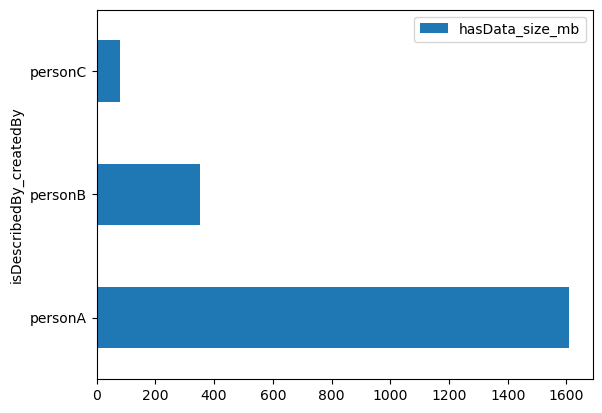

In [36]:
# Waagerechtes Diagramm

df_files_size_over_50_grouped.plot.barh()

In [40]:
# 2. Download PMD-Datei

url_data_pmd = "https://raw.githubusercontent.com/lschruff/library_carpentry_workshops/refs/heads/main/pandas_python_lesson/2025-12-01_frl_export_pmd.csv"
filename_pmd = "frl_export_pmd.csv"

urllib.request.urlretrieve(url_data_files, filename_pmd)

('frl_export_pmd.csv', <http.client.HTTPMessage at 0x23bb45105f0>)

In [41]:
# Datei einlesen

df_pmd = pd.read_csv(filename_pmd)
df_pmd.shape

(1201, 10)

In [42]:
# Spaltenüberschriften files-Dataframe
df_files.columns

Index(['@id', 'accessScheme', 'contentType', 'parentPid', 'publishScheme',
       'hasData_checksum_checksumValue', 'hasData_fileLabel', 'hasData_format',
       'hasData_size_bytes', 'isDescribedBy_created',
       'isDescribedBy_createdBy', 'hasData_size_mb'],
      dtype='object')

In [44]:
# Spaltenüberschriften pmd-Dataframe
df_pmd.columns

Index(['@id', 'abstractText', 'accessScheme', 'bibliographicCitation',
       'creator', 'issued', 'language', 'title', 'isDescribedBy_created',
       'isDescribedBy_createdBy'],
      dtype='object')

# Spaltenüberschriften für Mergen vorbereiten

In [45]:
# Kopie beider Dataframes erstellen

df_files_copy = df_files.copy()
df_pmd_copy = df_pmd.copy()

In [48]:
# Alle Spaltenüberschriften mit "_pmd" anreichern

for key in df_pmd_copy.columns:
    df_pmd_copy.rename(columns={key: f"{key}_pmd"}, inplace=True)

df_pmd_copy.columns

Index(['@id_pmd', 'abstractText_pmd', 'accessScheme_pmd',
       'bibliographicCitation_pmd', 'creator_pmd', 'issued_pmd',
       'language_pmd', 'title_pmd', 'isDescribedBy_created_pmd',
       'isDescribedBy_createdBy_pmd'],
      dtype='object')

In [50]:
# Alle Spaltenüberschriften außer "parentPid" mit "_file" anreichern

for key in df_files_copy.columns:
    if key == "parentPid":
        pass
    else:
        df_files_copy.rename(columns={key: f"{key}_file"}, inplace=True)

df_files_copy.columns

Index(['@id_file_file', 'accessScheme_file_file', 'contentType_file_file',
       'parentPid', 'publishScheme_file_file',
       'hasData_checksum_checksumValue_file_file',
       'hasData_fileLabel_file_file', 'hasData_format_file_file',
       'hasData_size_bytes_file_file', 'isDescribedBy_created_file_file',
       'isDescribedBy_createdBy_file_file', 'hasData_size_mb_file_file'],
      dtype='object')

In [52]:
# Schlüsselspalte umbenennen

df_pmd_copy.rename(columns={"@id_pmd": "parentPid"}, inplace=True)
df_pmd_copy.columns

Index(['parentPid', 'abstractText_pmd', 'accessScheme_pmd',
       'bibliographicCitation_pmd', 'creator_pmd', 'issued_pmd',
       'language_pmd', 'title_pmd', 'isDescribedBy_created_pmd',
       'isDescribedBy_createdBy_pmd'],
      dtype='object')

In [53]:
# Datafarme mergen

df_frl_merged = df_files_copy.merge(df_pmd_copy, how="left", on="parentPid")
df_frl_merged.shape

(1214, 21)

In [57]:
df_frl_merged[df_frl_merged["hasData_size_mb_file_file"] >=50 ]

,@id_file_file,accessScheme_file_file,contentType_file_file,parentPid,publishScheme_file_file,hasData_checksum_checksumValue_file_file,hasData_fileLabel_file_file,hasData_format_file_file,hasData_size_bytes_file_file,isDescribedBy_created_file_file,...,hasData_size_mb_file_file,abstractText_pmd,accessScheme_pmd,bibliographicCitation_pmd,creator_pmd,issued_pmd,language_pmd,title_pmd,isDescribedBy_created_pmd,isDescribedBy_createdBy_pmd
132,frl:6510240,public,file,frl:6510215,public,26c0282419a246d860a27c468b8d9980,VACCELERATE SHOWCASE EVENT JANUARY 23 2025_ Pr...,video/mp4,110881777,2025-02-27T10:36:46.420+0100,...,110,['VACCELERATE is a European network dedicated ...,public,NaN,"[{'prefLabel': 'Cornely, Oliver Andreas', '@id...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['VACCELERATE showcase event'],2025-02-25T09:09:12.984+0100,338.0
175,frl:6510333,public,file,frl:6510306,public,b2e84e3b3ad571f2623b809be88f3085,video1349932953.mp4,video/mp4,61888889,2025-03-07T08:00:52.395+0100,...,61,"[""Welcome to the video series of the Global Gu...",public,NaN,"[{'prefLabel': 'Rautemaa-Richardson, Riina', '...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Global guideline for the diagnosis and manag...,2025-03-05T11:16:50.106+0100,338.0
285,frl:6510786,public,file,frl:6510757,public,29bcc635bbaadb4548f25580417916e9,Global Guideline for the Diagnosis and Managem...,video/mp4,55726514,2025-03-25T10:46:31.493+0100,...,55,"[""Welcome to the video series of the Global Gu...",public,NaN,"[{'prefLabel': 'Vinh, Donald C.', '@id': 'http...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Global guideline for the diagnosis and manag...,2025-03-21T11:03:44.460+0100,338.0
509,frl:6511249,public,file,frl:6510298,public,bafceb7ea93f8776480fda9e1538de5d,Habilitationsschrift_zellbasierteImmunoassays_...,application/pdf,200260966,2025-05-09T13:06:30.007+0200,...,200,NaN,public,NaN,"[{'prefLabel': 'Dammermann, Werner', '@id': 'h...",2023.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Zellbasierte Immunoassays in Diagnostik und ...,2025-02-28T17:51:49.498+0100,339.0
530,frl:6511301,public,file,frl:6511165,public,ec0323b772f9b181480917c7670a30df,Global Guideline Diagnosis and Management of C...,video/mp4,589613575,2025-05-14T07:11:49.062+0200,...,589,"[""Welcome to the video series of the Global Gu...",public,NaN,"[{'prefLabel': 'Groll, Andreas Hermann', '@id'...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Global guideline for the diagnosis and manag...,2025-05-05T09:01:34.177+0200,338.0
566,frl:6511383,public,file,frl:6511298,public,03d6368770f5bbc30a1135cfadc71e09,Antifungal Prophylaxis and Stewardship in HSCT...,video/mp4,137438448,2025-05-15T16:21:32.116+0200,...,137,['Invasive fungal infections remain a major ca...,public,NaN,"[{'prefLabel': 'Gabriēlakē, Elenē', '@id': 'ht...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Antifungal prophylaxis and stewardship in HS...,2025-05-13T09:19:32.365+0200,338.0
631,frl:6511609,public,file,frl:6511346,public,43aaa5e454dfe7083995d4374ce43664,VACCELERATE WEBINAR Data Interoperability in C...,video/mp4,107503474,2025-06-02T10:31:28.589+0200,...,107,['We are excited to invite you to watch this i...,public,NaN,"[{'prefLabel': 'Pana, Zoi-Dorothea', '@id': 'h...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['Data interoperability in COVID-19 vaccine tr...,2025-05-15T09:49:20.544+0200,338.0
653,frl:6511670,public,file,frl:6511614,public,f51c4045ed2eb074fbec815fbf321938,VACCELERATE WEBINAR May 22 2024_ Willingness o...,video/mp4,87053869,2025-06-05T09:58:11.315+0200,...,87,['Willingness of EU medical and paramedical st...,public,NaN,"[{'prefLabel': 'Yiallouris, Andreas', '@id': '...",2025.0,[{'@id': 'http://id.loc.gov/vocabulary/iso639-...,['VACCELERATE webinar'],2025-06-02T12:06:40.614+0200,338.0
716,frl:6511901,public,file,frl:6511894,public,4fd205ae90e65e8e56fccd31ede16c5d,2025 Bodey Lecture_ Hematological Cancer and I...,video/m